**exactSubsetSum approximateSubsetSum, and their helper functions**

In [0]:
# returns the list of integers derived from L by increasing each element of L by number.
def plus(l,number): 
	li=l 
	n=len(li)
	for i in range(0,n):
		li[i]+=number
	return li

#returns the sorted list that is the merge of its two sorted input lists L and L0 with duplicate values removed. 
def mergeLists(li1,li2):
	x1=0
	x2=0
	ret=[]
	n1=len(li1)
	n2=len(li2)
	while(x1!=n1+1 and x2!=n2+1):
		if(x1==n1):
			ret = [*ret, *li2[x2:n2]]
			break
		if(x2==n2):
			ret = [*ret, *li1[x1:n1]]
			break

		if(li1[x1]<=li2[x2]):
			ret.append(li1[x1])
			x1+=1
		else:
			ret.append(li2[x2])
			x2+=1
	return ret

#remove each element in list li that is larger than t
def removeEach(li,t):
    n=len(li)
    ret=[]
    for i in li:
        if(i<=t):
            ret.append(i)	
    li=ret 
    return li

def exactSubsetSum(li,t):
	n=len(li)
	L=[[]]*(n+1)
	L[0]=[0]
	for i in range(1,n+1):
		L[i]=mergeLists(L[i-1].copy(),plus(L[i-1].copy(),li[i-1]))
		removed =removeEach(L[i],t) 
		L[i] = removed
	return max(L[n])

def trim(L,delta): # delta: the trim rate 
	n=len(L)
	L2=[L[0]]
	last=L[0]
	for i in range(1,n):
		if(L[i]>last*(1+delta)):
			L2.append(L[i])
			last=L[i]
	return L2

def appSubSet(S,t,e):
    n=len(S)
    L=[[]]*(n+1)
    L[0]=[0]
    for i in range(1,n+1):
        L[i]=mergeLists(L[i-1].copy(),plus(L[i-1].copy(),S[i-1]))
        L[i]=trim(L[i],e/(2*n))
        removed = removeEach(L[i],t)
        L[i] = removed
    return max(L[n])


In [0]:
#sample run
S=[]
e=0.0
t=0



print( "T is :",t)
print( "Real Subset Sum Alg. result: ",appSubSet(S,t,e) )


T is : 0
Real Subset Sum Alg. result:  0



# we should create random sets with different sizes and with different ranges
# the magnitude/size of the numbers (not only set itself) matter as well for runtime

In [0]:
#FUNCTIONS FOR PREPARING TESTING DATA 
import numpy as np
import random
from random import sample
import pandas as pd
import time
import random


def createRandomSubsetAndSum(S):
  subset_size=random.randint(2,len(S)) # |S| is trivial, so we do not consider
  subset=sample(S,subset_size)
  subset_sum=sum(subset)
  return subset, subset_sum

def checkHeuristicResult(S,t,e,subset):
  start_time = time.time()
  approx=appSubSet(S,t,e)
  execution_time= time.time() - start_time
  if (approx==t):
    success=True
    error=0
  else:
    success=False
    error= (t-approx)/t
  return approx,success,error,execution_time


def correctnessforSListAndE(SList,e):
  df=pd.DataFrame(columns=['S', 'setSize','subset', 't','e', 'approx', 'isSuccess','error','execution_time'])
  for S in SList:
    subset, t = createRandomSubsetAndSum(S)
    #print("in CfSLAndE\n")
    approx,isSuccess,error,execution_time= checkHeuristicResult(S,t,e,subset)
    new_row = {'S':S , 'setSize': len(S),'subset':subset,'t':t, 'e':e, 'approx':approx, 'isSuccess':isSuccess,'error':error,'execution_time': execution_time}
    df = df.append(new_row, ignore_index=True)
  return df 


def correctnessforSList(SList):
  #e_values=[0.4, 0.5]
  e_values= np.linspace(0,1,10,endpoint=False)
  # e_values is : array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])
  df_total=pd.DataFrame(columns=['S', 'setSize','subset', 't','e', 'approx', 'isSuccess','error','execution_time'])

  for e in e_values:
    df_e= correctnessforSListAndE(SList,e)
    df_total = df_total.append(df_e)
  return df_total



def createRandomSubsets(number_of_samples,set_size,set_range):
    n_set=[] # we will append n many(50) lists to show that   
    for i in range(0,number_of_samples): #produce 50 many set
        a_set=[]
        for j in range(0,set_size):
          elt=random.randint(1,set_range)
          while(elt in a_set): # elements of set must be unique
            elt=random.randint(0,set_range)
          a_set.append(elt)
        n_set.append(a_set)
    return n_set


In [0]:
#Blacbox Testing
def Testing():
  #range [1,100]
  set1_1_5_100= createRandomSubsets(1,5,100) # 1 set with |S|=5 and in range [1,100]
  set_1_20_100= createRandomSubsets(1,20,100) # 1 set with |S|=20 and in range [1,100]
  sets_1_40_100= createRandomSubsets(1,40,100) # 1 set with |S|=40 and in range [1,100]
  #range [1,1000]
  sets_1_5_1000= createRandomSubsets(1,5,1000)# 1 set with |S|=5 and in range [1,1000]
  sets_1_20_1000= createRandomSubsets(1,20,1000)# 1 set with |S|=20 and in range [1,1000]
  sets_1_100_1000= createRandomSubsets(1,100,1000) # 1 set with |S|=100 and in range [1,1000]
  #range [1,10000]
  sets_1_5_10000= createRandomSubsets(1,5,10000)# 1 set with |S|=5 and in range [1,10000]
  sets_1_20_10000= createRandomSubsets(1,20,10000)# 1 set with |S|=20 and in range [1,10000]
  sets_1_100_10000= createRandomSubsets(1,100,10000) # 1 set with |S|=100 and in range [1,10000]
  sets_1_1000_10000= createRandomSubsets(1,1000,10000) # 1 set with |S|=1000 and in range [1,10000]
  df1 = correctnessforSList(set1_1_5_100)
  df2 = correctnessforSList(set_1_20_100)
  df3 = correctnessforSList(sets_1_40_100)
  df4 = correctnessforSList(sets_1_5_1000)
  df5 = correctnessforSList(sets_1_20_1000)
  df6 = correctnessforSList(sets_1_100_10000)
  df7 = correctnessforSList(sets_1_5_10000)
  df8 = correctnessforSList(sets_1_20_10000)
  df9 = correctnessforSList(sets_1_100_10000)
  df10 = correctnessforSList(sets_1_1000_10000)
  df_result = df1.append(df2).append(df3).append(df4).append(df5).append(df6).append(df7).append(df8).append(d10)
  return df_result




    






In [0]:
df_test = Testing()

KeyboardInterrupt: ignored

In [0]:
df_test.to_excel("TestResults_all.xlsx")

In [0]:
# sadece 1 set için bile 10 dk filan sürüyor ortalama 
#caghan_test_sets=createRandomSubsets(1,1000,10000)
#df= correctnessforSList(caghan_test_sets)
#df.to_csv("caghan_test_sets_size_1000_range_10000.csv")

In [0]:
#CREATING RANDOM SAMPLES FOR ANALYSIS AND TESTING
# DON'T TAKE SO MUCH TIME

#range [1,100]
sets_50_5_100= createRandomSubsets(50,5,100) # 50 set with |S|=5 and in range [1,100]
sets_50_10_100= createRandomSubsets(50,10,100) # 50 set with |S|=10 and in range [1,100]
sets_50_20_100= createRandomSubsets(50,20,100) # 50 set with |S|=20 and in range [1,100]
sets_50_40_100= createRandomSubsets(50,40,100) # 50 set with |S|=40 and in range [1,100]
sets_50_80_100=createRandomSubsets(50,80,100) 

#range [1,1000]
sets_50_5_1000= createRandomSubsets(50,5,1000)# 50 set with |S|=5 and in range [1,1000]
sets_50_10_1000= createRandomSubsets(50,10,1000)# 50 set with |S|=10 and in range [1,1000]
sets_50_20_1000= createRandomSubsets(50,20,1000)# 50 set with |S|=20 and in range [1,1000]
sets_50_100_1000= createRandomSubsets(50,100,1000) # 50 set with |S|=100 and in range [1,1000]

#range [1,10000]
sets_50_5_10000= createRandomSubsets(50,5,10000)# 50 set with |S|=5 and in range [1,10000]
sets_50_10_10000= createRandomSubsets(50,10,10000)# 50 set with |S|=10 and in range [1,10000]
sets_50_20_10000= createRandomSubsets(50,20,10000)# 50 set with |S|=20 and in range [1,10000]
sets_50_100_10000= createRandomSubsets(50,100,10000) # 50 set with |S|=100 and in range [1,10000]
sets_50_1000_10000= createRandomSubsets(50,1000,10000) # 50 set with |S|=100 and in range [1,10000]

In [0]:
#CREATING EXPERIMENTING PHASE FOR RANE [1,100]

df_50_5_100= correctnessforSList(sets_50_5_100)
df_50_10_100=correctnessforSList(sets_50_10_100)
df_50_20_100=correctnessforSList(sets_50_20_100)
df_50_40_100=correctnessforSList(sets_50_40_100)
df_50_80_100=correctnessforSList(sets_50_80_100)



In [0]:
df_50_5_100

,S,setSize,subset,t,e,approx,isSuccess,error,execution_time
0,"[72, 25, 91, 97, 58]",5,"[58, 97, 25, 91]",271,0.0,271,True,0,0.000078
1,"[3, 50, 94, 89, 4]",5,"[4, 3, 94, 50]",151,0.0,151,True,0,0.000076
2,"[98, 82, 30, 35, 3]",5,"[35, 82, 30]",147,0.0,147,True,0,0.000067
3,"[58, 65, 38, 71, 78]",5,"[65, 38]",103,0.0,103,True,0,0.000057
4,"[23, 25, 54, 29, 59]",5,"[23, 29, 54]",106,0.0,106,True,0,0.000073
...,...,...,...,...,...,...,...,...,...
45,"[85, 41, 4, 92, 3]",5,"[85, 3, 41, 92]",221,0.9,218,False,0.0135747,0.000065
46,"[24, 13, 14, 68, 19]",5,"[68, 19, 14]",101,0.9,92,False,0.0891089,0.000066
47,"[20, 48, 53, 86, 40]",5,"[86, 53, 20, 48, 40]",247,0.9,227,False,0.0809717,0.000073
48,"[65, 30, 62, 41, 9]",5,"[30, 62, 65]",157,0.9,157,True,0,0.000081


In [0]:
# MERGING EXPERIMENT RESULTS FOR EASIER ANALYSIS
#TAKES LONG TIME (3-4 MINS for [1,100])

df_range100 =pd.DataFrame(columns=['S', 'setSize','subset', 't','e', 'approx', 'isSuccess','error','execution_time'])
df_range100_list=[df_50_5_100,df_50_10_100,df_50_20_100,df_50_40_100,df_50_80_100]
for df in df_range100_list:
  df_range100=df_range100.append(df)



In [0]:
df_range100.head()

,S,setSize,subset,t,e,approx,isSuccess,error,execution_time
0,"[72, 25, 91, 97, 58]",5,"[58, 97, 25, 91]",271,0.0,271,True,0,0.000078
1,"[3, 50, 94, 89, 4]",5,"[4, 3, 94, 50]",151,0.0,151,True,0,0.000076
2,"[98, 82, 30, 35, 3]",5,"[35, 82, 30]",147,0.0,147,True,0,0.000067
3,"[58, 65, 38, 71, 78]",5,"[65, 38]",103,0.0,103,True,0,0.000057
4,"[23, 25, 54, 29, 59]",5,"[23, 29, 54]",106,0.0,106,True,0,0.000073


In [0]:
#GET  range100_success_rates_table and take snapshot, put in latex as figure
n_samples=50
range100_success_rates_table=df_range100.groupby(['setSize', 'e'])['isSuccess'].sum().divide(n_samples).unstack()

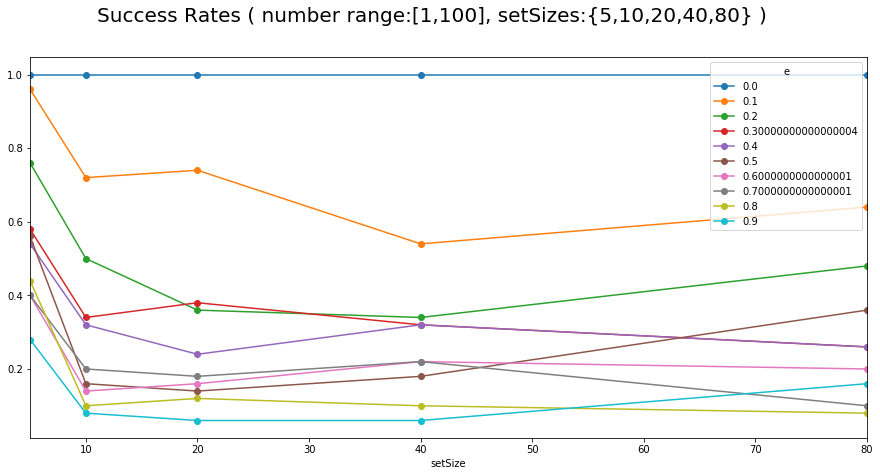

In [0]:
#GET SUCCESS RATES 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
n_samples=50
df_range100.groupby(['setSize', 'e'])['isSuccess'].sum().divide(n_samples).unstack().plot(ax=ax,linestyle='-', marker='o')
fig.suptitle('Success Rates ( number range:[1,100], setSizes:{5,10,20,40,80} ) ', fontsize=20)
fig.savefig("success_rate_graph_range100.png")

In [0]:
#Find the desired t-score depending on the Confidence Level desired to build

from scipy.stats import t
dof=50-1 # n=50 for our experiments
alpha = 0.025 # means we construct a %95 CI (2-sided )
#alpha = 0.05 # means we construct a %90 CI (2-sided )
t_score=t.ppf(1 - alpha, df=dof) 

#Getting CI tables for a given t-score
df_mean= df_range100.groupby(['setSize', 'e'])['execution_time'].mean().unstack() 
df_est_std_error= df_range100.groupby(['setSize', 'e'])['execution_time'].std().divide(np.sqrt(n_samples)).unstack()
upper_95= df_mean + df_est_std_error.multiply(t_score)
lower_95= df_mean - df_est_std_error.multiply(t_score)
CI_95_range100=lower_95.round(5).astype(str).add('-').add(upper_95.round(5).astype(str))
CI_95_range100

e,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
setSize,,,,,,,,,,
5,7e-05-8e-05,7e-05-8e-05,7e-05-9e-05,7e-05-8e-05,7e-05-8e-05,6e-05-7e-05,6e-05-7e-05,6e-05-7e-05,6e-05-7e-05,6e-05-7e-05
10,0.00084-0.00109,0.00075-0.00095,0.00059-0.00072,0.0005-0.0006,0.0005-0.00056,0.00043-0.0005,0.00041-0.00046,0.00036-0.00041,0.00032-0.00037,0.00035-0.00041
20,0.00811-0.01059,0.00679-0.00872,0.00601-0.00711,0.00448-0.00537,0.00379-0.00448,0.00329-0.0037,0.0028-0.00324,0.00249-0.00288,0.00234-0.00267,0.0022-0.00252
40,0.04068-0.05368,0.03664-0.04759,0.03431-0.03879,0.02348-0.02857,0.02123-0.02476,0.01874-0.0214,0.01576-0.01816,0.01437-0.01658,0.01359-0.01515,0.01218-0.01373
80,0.21281-0.26214,0.16794-0.21044,0.13097-0.15808,0.11127-0.13228,0.09851-0.11186,0.07578-0.09238,0.07597-0.08782,0.06655-0.07797,0.06234-0.07116,0.06069-0.06689


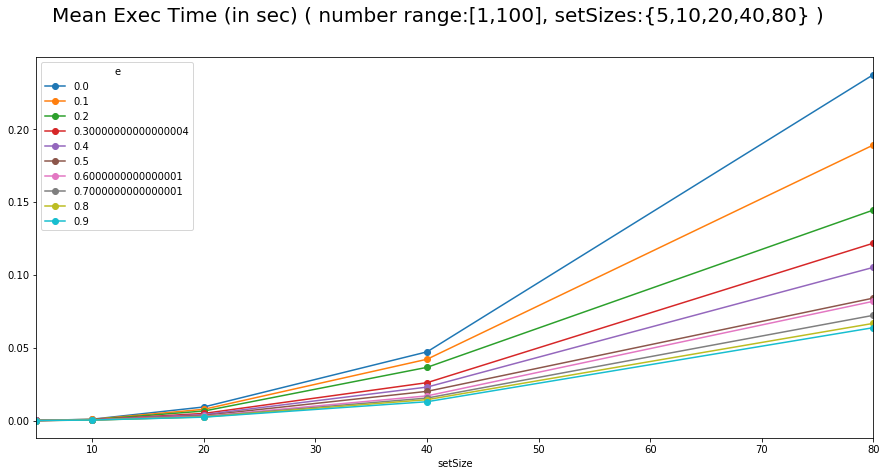

In [0]:
#GET MEAN EXEC TIME GRAPH
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
n_samples=50
df_range100.groupby(['setSize', 'e'])['execution_time'].mean().unstack().plot(ax=ax,linestyle='-', marker='o')
fig.suptitle('Mean Exec Time (in sec) ( number range:[1,100], setSizes:{5,10,20,40,80} ) ', fontsize=20)
fig.savefig("mean_exec_time_graph_range100.png")

In [0]:
#range [1,10000]
df_50_5_10000= correctnessforSList(sets_50_5_10000)# 50 set with |S|=5 and in range [1,10000]
df_50_10_10000= correctnessforSList(sets_50_10_10000)# 50 set with |S|=10 and in range [1,10000]




In [0]:
df_50_20_10000= correctnessforSList(sets_50_20_10000)# 50 set with |S|=20 and in range [1,10000]
df_50_100_10000= correctnessforSList(sets_50_100_10000) # 50 set with |S|=100 and in range [1,10000]



In [0]:
df_50_1000_10000= correctnessforSList(sets_50_1000_10000) # 50 set with |S|=100 and in range [1,10000]

In [0]:
df_range10000 =pd.DataFrame(columns=['S', 'setSize','setSize','subset', 't','e', 'approx', 'isSuccess','error','execution_time'])
df_range10000_list=[df_50_5_10000,df_50_10_10000,df_50_20_10000,df_50_100_10000,df_50_1000_10000]

for df in df_range10000_list:
  df_range10000=df_range10000.append(df)
df_range10000.to_excel("df_range10000.xlsx")
#df_range10000 is ready for std mean runtime analysis and creating a crosstab for correctness analysis

df_range10000

In [0]:
df_range10000.head()

Doing same analysis for range [1,1000] 

In [0]:
#range [1,1000]
df_50_5_1000= correctnessforSList(sets_50_5_1000) # error rate, isSuccess result, exec_time, approx result for given set
df_50_10_1000= correctnessforSList(sets_50_10_1000)
df_50_20_1000= correctnessforSList(sets_50_20_1000)
df_50_100_1000= correctnessforSList(sets_50_100_1000) 

df_range1000_list=[df_50_5_1000,df_50_10_1000,df_50_20_1000,df_50_100_1000]
df_range1000 =pd.DataFrame(columns=['S', 'setSize','subset', 't','e', 'approx', 'isSuccess','error','execution_time'])

for df in df_range1000_list:
  df_range1000=df_range1000.append(df)

Doing same analysis for range [1,1000]